# Test Implementation of Classifiers 

## Importing libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score ,mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.style.use('seaborn-darkgrid')

/var/folders/wq/7cvbc6jd411dg1wd3j_ksjv80000gn/T/ipykernel_23076/1749843426.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


## Data processing

In [2]:
raw_data = pd.read_csv('../data/gravier/gravier_csv/alon.csv')
print(f'NaN values: {raw_data.isnull().values.any()}')

print(f"Data file containing Nan value: {raw_data.isnull().values.any()}")
raw_data.head()

NaN values: False
Data file containing Nan value: False


,x.X1,x.X2,x.X3,x.X4,x.X5,x.X6,x.X7,x.X8,x.X9,x.X10,...,x.X1992,x.X1993,x.X1994,x.X1995,x.X1996,x.X1997,x.X1998,x.X1999,x.X2000,y
0,8589.42,5468.24,4263.41,4064.94,1997.89,5282.33,2169.72,2773.42,7526.39,4607.68,...,67.56,259.91,138.90,88.23,39.67,67.83,75.68,83.52,28.70,t
1,9164.25,6719.53,4883.45,3718.16,2015.22,5569.91,3849.06,2793.39,7017.73,4802.25,...,92.24,96.28,150.59,82.24,85.03,152.20,186.57,44.47,16.77,n
2,3825.71,6970.36,5369.97,4705.65,1166.55,1572.17,1325.40,1472.26,3296.95,2786.58,...,82.72,31.10,193.92,76.97,224.62,31.23,42.66,16.09,15.16,t
3,6246.45,7823.53,5955.84,3975.56,2002.61,2130.54,1531.14,1714.63,3869.79,4989.41,...,41.68,5.93,183.01,74.53,67.71,48.34,42.52,49.98,16.09,n
4,3230.33,3694.45,3400.74,3463.59,2181.42,2922.78,2069.25,2948.58,3303.37,3109.41,...,76.60,161.35,61.70,54.56,223.36,73.10,57.60,7.49,31.81,t


In [3]:
# Separate the features from the labels
X = raw_data.iloc[:, :-1].values
y = raw_data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Random Forest Classifier

In [4]:
# Train the random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
rfc_score = accuracy_score(y_test, y_pred_rfc)
print('Accuracy:', rfc_score)

Accuracy: 0.6923076923076923


## Naive Bayes

In [5]:
# Train and evaluate the naive Bayes classifier using the testing set
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
score_nb = accuracy_score(y_test, y_pred_nb)
print('Naive Bayes classifier accuracy:', score_nb)

Naive Bayes classifier accuracy: 0.38461538461538464


## Decision Tree

In [6]:
# Train and evaluate the decision tree classifier using the testing set
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dt = dtc.predict(X_test)
score_dt = accuracy_score(y_test, y_pred_dt)
print('Decision tree classifier accuracy:', score_dt)

Decision tree classifier accuracy: 0.6923076923076923


## Support Vector Machine (SVM)

In [7]:
# Train and evaluate the support vector machine classifier using the testing set
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
score_svm = accuracy_score(y_test, y_pred_svm)
print('Support vector machine classifier accuracy:', score_svm)

Support vector machine classifier accuracy: 0.7692307692307693


## Plotting Results

In [8]:
import matplotlib.pyplot as plt

def plot_scores(rf_scores, nb_scores, dt_scores, svm_scores):
    """
    Plots the cross-validation scores for four different classifiers.

    Args:
        rf_scores (list): List of cross-validation scores for random forest classifier.
        nb_scores (list): List of cross-validation scores for naive Bayes classifier.
        dt_scores (list): List of cross-validation scores for decision tree classifier.
        svm_scores (list): List of cross-validation scores for support vector machine classifier.
    """
    labels = ['Random Forest', 'Naive Bayes', 'Decision Tree', 'Support Vector Machine']
    scores = [rf_scores, nb_scores, dt_scores, svm_scores]

    fig, ax = plt.subplots()
    ax.boxplot(scores, labels=labels)
    ax.set_ylabel('Cross-validation accuracy')

    plt.show()


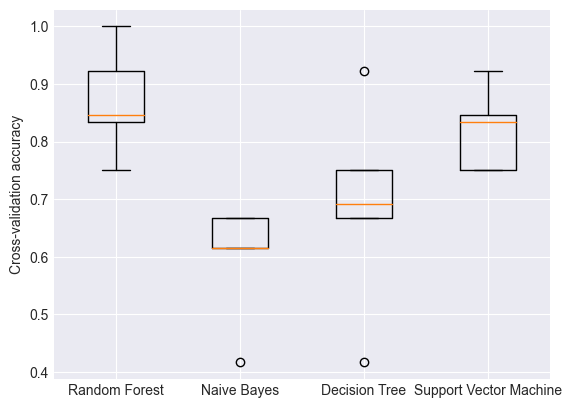

In [9]:
rf_scores = cross_val_score(rfc, X, y, cv=5)
nb_scores = cross_val_score(nb, X, y, cv=5)
dt_scores = cross_val_score(dtc, X, y, cv=5)
svm_scores = cross_val_score(svm, X, y, cv=5)

# Plot the scores using the function
plot_scores(rf_scores, nb_scores, dt_scores, svm_scores)

Random forest accuracy: 0.6923076923076923
Random forest precision: 0.8333333333333334
Random forest recall: 0.625
Random forest F1 score: 0.7142857142857143
Random forest confusion matrix:
 [[4 1]
 [3 5]]


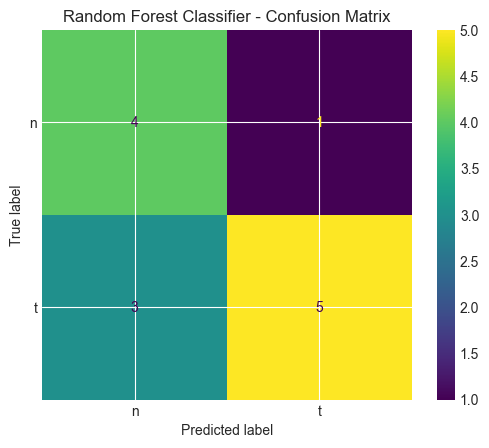

In [10]:
rfc_accuracy = accuracy_score(y_test, y_pred_rfc)
print('Random forest accuracy:', rfc_accuracy)

# Calculate precision, recall, and F1 score for the random forest classifier
rfc_precision = precision_score(y_test, y_pred_rfc, pos_label='t')
rfc_recall = recall_score(y_test, y_pred_rfc, pos_label='t')
rfc_f1 = f1_score(y_test, y_pred_rfc, pos_label='t')
print('Random forest precision:', rfc_precision)
print('Random forest recall:', rfc_recall)
print('Random forest F1 score:', rfc_f1)

# Calculate the confusion matrix for the random forest classifier
rfc_confusion_matrix = confusion_matrix(y_test, y_pred_rfc)
print('Random forest confusion matrix:\n', rfc_confusion_matrix)

# Plot the confusion matrix for the random forest classifier
disp_rfc = ConfusionMatrixDisplay(confusion_matrix=rfc_confusion_matrix, display_labels=['n', 't'])
disp_rfc.plot()
plt.title('Random Forest Classifier - Confusion Matrix')
plt.show()

Naive Bayes accuracy: 0.38461538461538464
Naive Bayes precision: 0.5
Naive Bayes recall: 0.125
Naive Bayes F1 score: 0.2
Random forest confusion matrix:
 [[4 1]
 [7 1]]


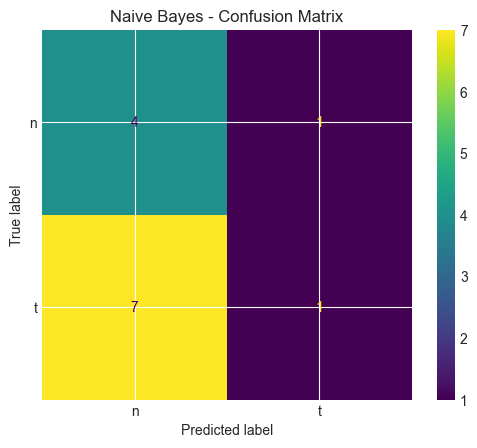

In [11]:
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print('Naive Bayes accuracy:', nb_accuracy)

# Calculate precision, recall, and F1 score for the random forest classifier
nb_precision = precision_score(y_test, y_pred_nb, pos_label='t')
nb_recall = recall_score(y_test, y_pred_nb, pos_label='t')
nb_f1 = f1_score(y_test, y_pred_nb, pos_label='t')
print('Naive Bayes precision:', nb_precision)
print('Naive Bayes recall:', nb_recall)
print('Naive Bayes F1 score:', nb_f1)

# Calculate the confusion matrix for the random forest classifier
nb_confusion_matrix = confusion_matrix(y_test, y_pred_nb)
print('Random forest confusion matrix:\n', nb_confusion_matrix)

# Plot the confusion matrix for the random forest classifier
disp_nb = ConfusionMatrixDisplay(confusion_matrix=nb_confusion_matrix, display_labels=['n', 't'])
disp_nb.plot()
plt.title('Naive Bayes - Confusion Matrix')
plt.show()

Random forest accuracy: 0.6923076923076923
Random forest precision: 0.75
Random forest recall: 0.75
Random forest F1 score: 0.75
Random forest confusion matrix:
 [[3 2]
 [2 6]]


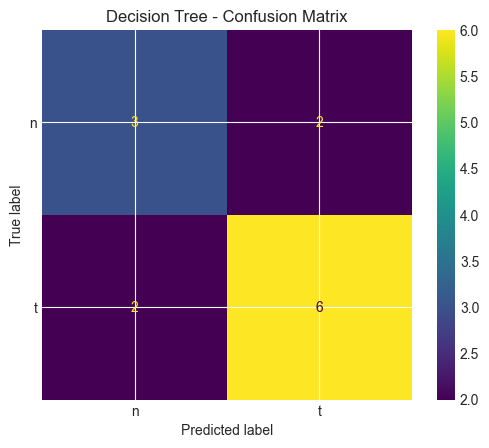

In [12]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print('Random forest accuracy:', dt_accuracy)

# Calculate precision, recall, and F1 score for the random forest classifier
dt_precision = precision_score(y_test, y_pred_dt, pos_label='t')
dt_recall = recall_score(y_test, y_pred_dt, pos_label='t')
dt_f1 = f1_score(y_test, y_pred_dt, pos_label='t')
print('Random forest precision:', dt_precision)
print('Random forest recall:', dt_recall)
print('Random forest F1 score:', dt_f1)

# Calculate the confusion matrix for the random forest classifier
dt_confusion_matrix = confusion_matrix(y_test, y_pred_dt)
print('Random forest confusion matrix:\n', dt_confusion_matrix)

# Plot the confusion matrix for the random forest classifier
disp_dt = ConfusionMatrixDisplay(confusion_matrix=dt_confusion_matrix, display_labels=['n', 't'])
disp_dt.plot()
plt.title('Decision Tree - Confusion Matrix')
plt.show()

Random forest accuracy: 0.7692307692307693
Random forest precision: 0.8571428571428571
Random forest recall: 0.75
Random forest F1 score: 0.7999999999999999
Random forest confusion matrix:
 [[4 1]
 [2 6]]


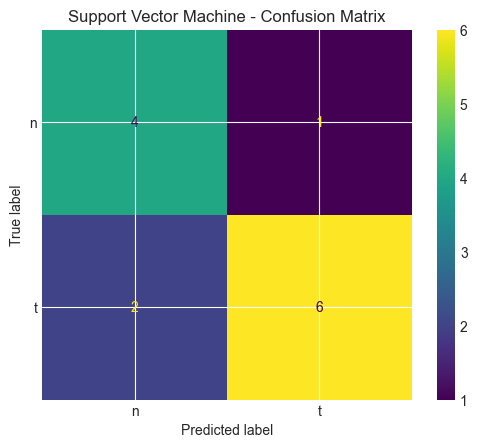

In [13]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print('Random forest accuracy:', svm_accuracy)

# Calculate precision, recall, and F1 score for the random forest classifier
svm_precision = precision_score(y_test, y_pred_svm, pos_label='t')
svm_recall = recall_score(y_test, y_pred_svm, pos_label='t')
svm_f1 = f1_score(y_test, y_pred_svm, pos_label='t')
print('Random forest precision:', svm_precision)
print('Random forest recall:', svm_recall)
print('Random forest F1 score:', svm_f1)

# Calculate the confusion matrix for the random forest classifier
svm_confusion_matrix = confusion_matrix(y_test, y_pred_svm)
print('Random forest confusion matrix:\n', svm_confusion_matrix)

# Plot the confusion matrix for the random forest classifier
disp_svm = ConfusionMatrixDisplay(confusion_matrix=svm_confusion_matrix, display_labels=['n', 't'])
disp_svm.plot()
plt.title('Support Vector Machine - Confusion Matrix')
plt.show()

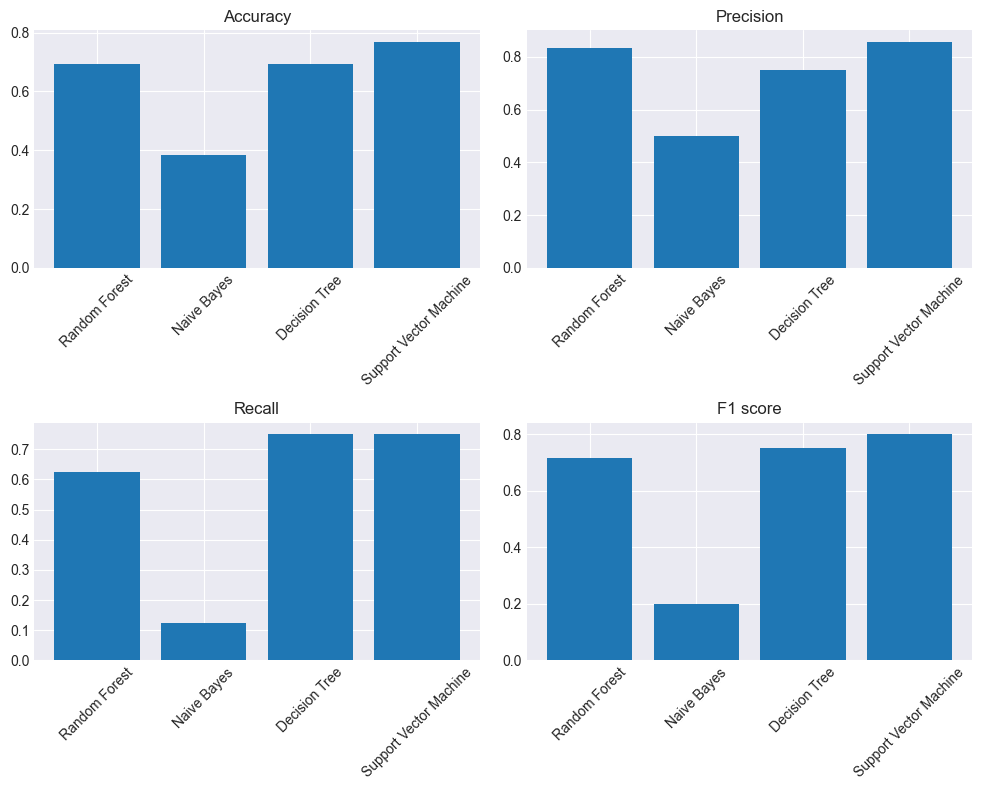

In [14]:
classifiers = ['Random Forest', 'Naive Bayes', 'Decision Tree', 'Support Vector Machine']
accuracy_scores = [rfc_accuracy, nb_accuracy, dt_accuracy, svm_accuracy]
precision_scores = [rfc_precision, nb_precision, dt_precision, svm_precision]
recall_scores = [rfc_recall, nb_recall, dt_recall, svm_recall]
f1_scores = [rfc_f1, nb_f1, dt_f1, svm_f1]

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax[0, 0].bar(classifiers, accuracy_scores)
ax[0, 0].set_title('Accuracy')
ax[0, 0].tick_params(axis='x', rotation=45)  
ax[0, 1].bar(classifiers, precision_scores)
ax[0, 1].set_title('Precision')
ax[0, 1].tick_params(axis='x', rotation=45)  
ax[1, 0].bar(classifiers, recall_scores)
ax[1, 0].set_title('Recall')
ax[1, 0].tick_params(axis='x', rotation=45)  
ax[1, 1].bar(classifiers, f1_scores)
ax[1, 1].set_title('F1 score')
ax[1, 1].tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()